# Desafio Bonus

## Importação de dependências e configuração do dispositivo

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Pré-Processamento

In [273]:
data = pd.read_csv("dados_nir.csv")
data

,carbono_organico,carbono_total,nitrogenio_total,argila,areia,lodo,densidade_aparente,ph_agua,carbonato,potassio,...,2532,2534,2536,2538,2540,2542,2544,2546,2548,2550
0,0.5200,0.51502,0.02649,49.93611,22.9,27.2,NaN,4.81,NaN,0.88137,...,0.138690,0.138212,0.137727,0.137237,0.136740,0.136235,0.135727,0.135212,0.134692,0.134163
1,0.1500,0.15451,0.02046,36.05959,18.6,45.3,1.67131,6.37,NaN,0.30398,...,0.394498,0.393718,0.392915,0.392090,0.391228,0.390332,0.389390,0.388402,0.387355,0.386245
2,0.8956,0.90996,0.09325,21.46390,10.7,67.8,1.17019,7.78,0.11663,0.80226,...,0.507267,0.506657,0.506060,0.505472,0.504900,0.504338,0.503792,0.503257,0.502737,0.502232
3,0.3800,0.37688,0.04956,35.94715,2.1,62.0,1.32571,7.11,NaN,0.44368,...,0.590587,0.589850,0.589120,0.588398,0.587682,0.586973,0.586272,0.585575,0.584888,0.584205
4,0.1800,0.17545,0.03677,54.09450,3.5,42.4,1.22003,7.05,NaN,0.96416,...,0.454657,0.453862,0.453073,0.452287,0.451502,0.450708,0.449912,0.449105,0.448285,0.447450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,1.3900,1.38599,0.15400,29.21183,8.6,62.2,1.45599,6.50,NaN,0.87103,...,0.544790,0.544550,0.544365,0.544230,0.544145,0.544105,0.544115,0.544165,0.544260,0.544400
1972,1.2800,1.28361,0.12422,35.45140,11.4,53.1,NaN,5.44,NaN,0.81826,...,0.419525,0.419150,0.418815,0.418510,0.418235,0.417995,0.417785,0.417600,0.417430,0.417290
1973,1.8400,1.83704,0.19499,24.78274,17.2,58.0,1.18506,6.80,NaN,1.60070,...,0.484470,0.484375,0.484325,0.484315,0.484345,0.484420,0.484535,0.484685,0.484870,0.485095
1974,1.3900,1.38972,0.15441,27.38510,14.7,57.9,1.50977,7.10,NaN,0.98071,...,0.402505,0.402295,0.402130,0.402000,0.401915,0.401865,0.401850,0.401880,0.401940,0.402030


In [274]:
data.describe()

,carbono_organico,carbono_total,nitrogenio_total,argila,areia,lodo,densidade_aparente,ph_agua,carbonato,potassio,...,2532,2534,2536,2538,2540,2542,2544,2546,2548,2550
count,1974.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1085.000000,1976.000000,665.000000,1976.000000,...,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,2.070306,2.316042,0.171535,19.753276,42.044838,38.202176,1.298794,6.284723,6.139778,0.559341,...,0.412755,0.412520,0.412306,0.412111,0.411937,0.411782,0.411647,0.411532,0.411437,0.411360
std,2.769084,2.815354,0.184424,13.771263,28.093518,20.145275,0.239626,1.269658,9.602257,0.736579,...,0.126550,0.126560,0.126573,0.126588,0.126607,0.126632,0.126663,0.126701,0.126747,0.126803
min,0.017600,0.016100,0.000000,0.000000,0.300000,0.000000,0.202110,3.690000,0.006560,0.000000,...,0.084987,0.084913,0.084780,0.084603,0.084370,0.084093,0.083773,0.083413,0.083020,0.082587
25%,0.650000,0.822475,0.065645,8.753855,17.800000,22.700000,1.176650,5.230000,0.285940,0.151817,...,0.325307,0.325290,0.325306,0.325198,0.324945,0.324603,0.324461,0.324120,0.324167,0.324128
50%,1.390000,1.614710,0.130475,17.842815,39.200000,38.100000,1.318470,6.170000,1.908130,0.349670,...,0.400497,0.400157,0.399867,0.399592,0.399578,0.399400,0.399370,0.399149,0.398968,0.398566
75%,2.705700,2.999635,0.224417,27.749268,64.625000,52.600000,1.455730,7.400000,8.230870,0.698890,...,0.485329,0.485175,0.484772,0.484439,0.484349,0.484272,0.484016,0.483855,0.483659,0.483486
max,53.880000,53.879520,3.019740,76.969500,100.000000,87.900000,2.033140,9.520000,89.030870,11.247860,...,0.864228,0.863775,0.863290,0.862795,0.862275,0.861745,0.861195,0.860640,0.860078,0.859498


In [275]:
data.iloc[:, :10].isnull().sum()

,0
carbono_organico,2
carbono_total,0
nitrogenio_total,0
argila,0
areia,0
lodo,0
densidade_aparente,891
ph_agua,0
carbonato,1311
potassio,0


(array([1.842e+03, 1.210e+02, 6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([1.760000e-02, 5.403840e+00, 1.079008e+01, 1.617632e+01,
        2.156256e+01, 2.694880e+01, 3.233504e+01, 3.772128e+01,
        4.310752e+01, 4.849376e+01, 5.388000e+01]),
 <BarContainer object of 10 artists>)

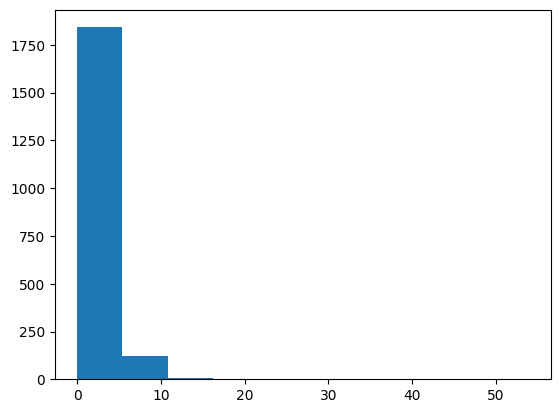

In [276]:
plt.hist(x = data['carbono_organico'])

(array([  4.,   6.,  16.,  53., 129., 305., 353., 174.,  39.,   6.]),
 array([0.20211 , 0.385213, 0.568316, 0.751419, 0.934522, 1.117625,
        1.300728, 1.483831, 1.666934, 1.850037, 2.03314 ]),
 <BarContainer object of 10 artists>)

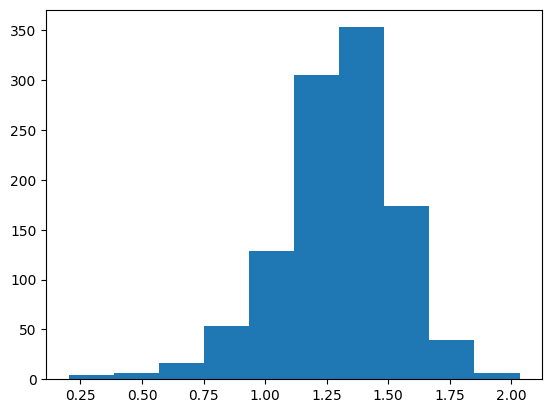

In [277]:
plt.hist(x = data['densidade_aparente'])

(array([513.,  78.,  42.,  23.,   3.,   3.,   1.,   1.,   0.,   1.]),
 array([6.5600000e-03, 8.9089910e+00, 1.7811422e+01, 2.6713853e+01,
        3.5616284e+01, 4.4518715e+01, 5.3421146e+01, 6.2323577e+01,
        7.1226008e+01, 8.0128439e+01, 8.9030870e+01]),
 <BarContainer object of 10 artists>)

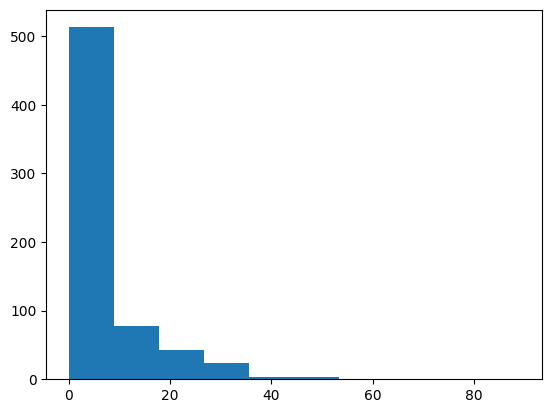

In [278]:
plt.hist(x = data['carbonato'])

In [279]:
data.iloc[:, :10].dtypes

,0
carbono_organico,float64
carbono_total,float64
nitrogenio_total,float64
argila,float64
areia,float64
lodo,float64
densidade_aparente,float64
ph_agua,float64
carbonato,float64
potassio,float64


In [280]:
def data_preprocessing(data):
  data["carbono_organico"] = data["carbono_organico"].fillna(data["carbono_organico"].mean())
  data["densidade_aparente"] = data["densidade_aparente"].fillna(data["densidade_aparente"].mean())
  data.drop(columns=['carbonato'], inplace=True)
  scaler = StandardScaler()
  data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
  return data

data = data_preprocessing(data)

In [281]:
data.describe()

,carbono_organico,carbono_total,nitrogenio_total,argila,areia,lodo,densidade_aparente,ph_agua,potassio,1350,...,2532,2534,2536,2538,2540,2542,2544,2546,2548,2550
count,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,...,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03,1.976000e+03
mean,-1.006842e-16,3.595864e-17,-5.034210e-17,-2.876691e-17,-4.674623e-17,2.876691e-17,-3.955450e-17,6.256803e-16,-3.056484e-17,7.191728e-17,...,-1.546222e-16,-3.847575e-16,2.948609e-16,-3.595864e-18,1.618139e-16,-1.905808e-16,3.847575e-16,-2.517105e-17,-3.631823e-16,-1.761973e-16
std,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,...,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,-7.418576e-01,-8.171352e-01,-9.303474e-01,-1.434747e+00,-1.486300e+00,-1.896814e+00,-6.179109e+00,-2.044157e+00,-7.595680e-01,-2.913824e+00,...,-2.590682e+00,-2.589199e+00,-2.588306e+00,-2.587851e+00,-2.587920e+00,-2.588381e+00,-2.589212e+00,-2.590367e+00,-2.591766e+00,-2.593443e+00
25%,-5.133053e-01,-5.306422e-01,-5.743121e-01,-7.989250e-01,-8.632232e-01,-7.697140e-01,-3.715124e-02,-8.309247e-01,-5.534043e-01,-7.159490e-01,...,-6.911831e-01,-6.894133e-01,-6.875231e-01,-6.867625e-01,-6.872744e-01,-6.886154e-01,-6.885062e-01,-6.900843e-01,-6.887056e-01,-6.881078e-01
50%,-2.458657e-01,-2.491729e-01,-2.226971e-01,-1.387632e-01,-1.012888e-01,-5.073248e-03,0.000000e+00,-9.038024e-02,-2.847264e-01,-3.747729e-02,...,-9.688693e-02,-9.770779e-02,-9.830194e-02,-9.891985e-02,-9.763995e-02,-9.780146e-02,-9.695380e-02,-9.775916e-02,-9.839574e-02,-1.009232e-01
75%,2.294176e-01,2.428703e-01,2.868139e-01,5.807757e-01,8.039534e-01,7.148807e-01,2.525956e-01,8.786300e-01,1.895041e-01,6.212583e-01,...,5.736289e-01,5.742149e-01,5.726749e-01,5.715048e-01,5.720858e-01,5.725939e-01,5.714954e-01,5.709593e-01,5.699558e-01,5.689440e-01
max,1.872427e+01,1.831973e+01,1.544766e+01,4.155807e+00,2.063459e+00,2.467596e+00,4.137570e+00,2.548794e+00,1.451470e+01,4.379048e+00,...,3.568448e+00,3.566432e+00,3.563948e+00,3.561140e+00,3.557867e+00,3.554211e+00,3.550066e+00,3.545525e+00,3.540541e+00,3.535014e+00


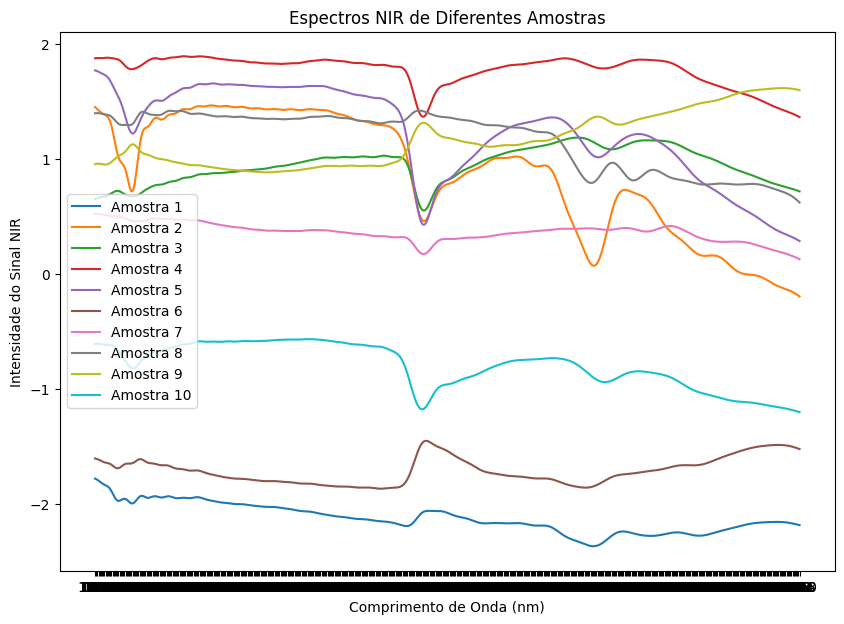

In [282]:
data_nir = data.iloc[:, 9:]
plt.figure(figsize=(10, 7))
for i in range(10):
  plt.plot(data_nir.columns, data_nir.iloc[i, :], label=f"Amostra {i+1}")

plt.xlabel("Comprimento de Onda (nm)")
plt.ylabel("Intensidade do Sinal NIR")
plt.title("Espectros NIR de Diferentes Amostras")
plt.legend()
plt.show()

### Separando os dados de treino e teste

In [283]:
random_seed = 42

X = data.iloc[:, 9:]
y = data.iloc[:, :9]

X = torch.from_numpy(X.values).type(torch.float)
y = torch.from_numpy(y.values).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=random_seed)

In [284]:
len(X_train), len(y_train), len(X_test), len(y_test)

(1383, 1383, 593, 593)

## Modelo de regressão multivariada

In [285]:
import torch.nn as nn

class Modelo(nn.Module):
  def __init__(self,
               input_features: int,
               output_features):
      super().__init__()
      self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=256),
        nn.BatchNorm1d(num_features=256),
        nn.ReLU(),

        nn.Linear(in_features=256, out_features=128),
        nn.BatchNorm1d(num_features=128),
        nn.ReLU(),

        nn.Linear(in_features=128, out_features=64),
        nn.BatchNorm1d(num_features=64),
        nn.ReLU(),
        nn.Linear(in_features=64, out_features=output_features)
      )

  def forward(self, x):
    return self.layer_stack(x)

model_1 = Modelo(input_features=601,
                  output_features=9).to(device)

## Funções de perda e otimização

In [286]:
# Definição das funções de loss e optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [287]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([1383, 601]),
 torch.Size([1383, 9]),
 torch.Size([593, 601]),
 torch.Size([593, 9]))

## Loop de treino e teste

In [288]:
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)

epoch_count = []
loss_values = []
test_loss_values = []

epochs = 2000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop de Treino e Teste
for epoch in range(epochs):
  # Treino
  model_1.train()

  y_pred = model_1(X_train).squeeze()

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Teste
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test).squeeze()
    test_loss = loss_fn(test_pred, y_test)
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

  if epoch % 500 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.76256 | Test loss: 0.72173
Epoch: 500 | Loss: 0.48401 | Test loss: 0.55411
Epoch: 1000 | Loss: 0.42257 | Test loss: 0.52255
Epoch: 1500 | Loss: 0.39414 | Test loss: 0.49950


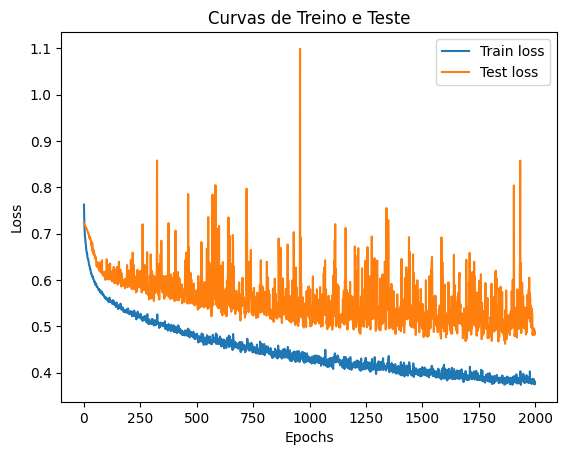

In [289]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Curvas de Treino e Teste")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Avaliação do modelo

In [291]:
# Predições e Métricas
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test).squeeze()

mse = loss_fn(y_preds, y_test)
rmse = torch.sqrt(mse)

ss_total = torch.sum((y_test - torch.mean(y_test))**2)
ss_residual = torch.sum((y_test - y_preds)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse.item():.2f}")
print(f"R²: {r2.item():.2f}")

MSE: 0.48
RMSE: 0.70
R²: 0.35


### Discussão sobre o modelo:
* O modelo multivariado teve dificuldade em explicar os dados (R² baixo).
* A perda no treinamento diminuiu com o tempo, porém a perda nos teste oscilou muito, o que pode indicar que o modelo estar com problemas de overfitting ou dados ruidosos.
* Uma abordagem alternativa pode ser utilizar modelos multivariados menores (com menos variáveis de saída por modelo) ou até mesmo modelos univariados, que podem gerar resultados mais consistentes.
* Modelos univariados também podem ser uma boa alternativa para colunas com muitos dados faltantes, como o "carbonato".
